# EDA Case Study
***
***

## II. Import Libraries and set required parameters

In [1]:
# numpy : Numerical & Scientific computing
import numpy as np

# pandas : for tabular data
import pandas as pd

# os : used for operating system dependent functionality
import os

# re : to handle regular expresiions
import re

# matplotlib : data visualization
import matplotlib.pyplot as plt
# set the backend of matplotlib to the 'inline' backend
%matplotlib inline 

# seaborn : advanced visualization
import seaborn as sns

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.2f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', 100) # to display all the columns

np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})
import warnings
warnings.filterwarnings('ignore')


## Data Sourcing

In [2]:
loan = pd.read_csv('./loan.csv')
print(loan.shape)

(39717, 111)


In [3]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

#### Get some insights

In [4]:
loan.head(2)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0   10.65%       162.87     B        B2       NaN  10+ years           RENT   
1   15.27%        59.83     C        C4     Ryder   < 1 year           RENT   

   annual_inc verification_status issue_d  loan_status pymnt_plan  \
0    24000.00            Verified  Dec-11   Fully Paid          n   
1    30000.00     Source Verified  Dec-11  Charged Off          n   

                                                 url  \
0  https://lendingclub.com/browse/loanDetail.acti...   
1  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc      purpose     title  \
0    Borrower added on 12/22/11 > I need to upgra...  credit_card  Computer   
1    Borrower added on 12/22/11 > I plan to use t...          car      bike   

  zip_code addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ 27.65            0           Jan-85               1   
1    309xx         GA  1.00            0           Apr-99               5   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     nan                     nan         3        0   
1                     nan                     nan         3        0   

   revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0      13648     83.70%          9                   f       0.00   
1       1687      9.40%          4                   f       0.00   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0           0.00      5863.16          5833.84          5000.00   
1           0.00      1008.71          1008.71           456.46   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0       Jan-15           171.62          NaN             May-16   
1       Apr-13           119.66          NaN             Sep-13   

   collections_12_mths_ex_med  ...  open_il_12m  open_il_24m  \
0                        0.00  ...          nan          nan   
1                        0.00  ...          nan          nan   

  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  open_rv_24m  \
0                nan           nan      nan          nan          nan   
1                nan           nan      nan          nan          nan   

   max_bal_bc  all_util  total_rev_hi_lim  inq_fi  total_cu_tl  inq_last_12m  \
0         nan       nan               nan     nan          nan           nan   
1         nan       nan               nan     nan          nan           nan   

   acc_open_past_24mths  avg_cur_bal  bc_open_to_buy  bc_util  \
0                   nan          nan             nan      nan   
1                   nan          nan             nan      nan   

   chargeoff_within_12_mths  delinq_amnt  mo_sin_old_il_acct  \
0                      0.00            0                 nan   
1                      0.00            0                 nan   

   mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  mort_acc  \
0                   nan                    nan             nan       nan   
1                   nan                    nan             nan       nan   

   mths_since_recent_bc  mths_since_recent_bc_dlq  mths_since_recent_inq  \
0                   nan                       nan                    nan   
1                   nan                       nan                    nan   

   mths_since_recent_revol_delinq  num_accts_ever_120_pd  num_actv_bc_tl  \
0                             nan                 

__List of Columns & NA counts where NA values are more than 30%__

In [7]:
NA_Cols = loan.isnull().sum().sort_values(ascending=False)

In [8]:
NA_Cols

total_il_high_credit_limit     39717
mo_sin_old_rev_tl_op           39717
bc_util                        39717
bc_open_to_buy                 39717
avg_cur_bal                    39717
acc_open_past_24mths           39717
inq_last_12m                   39717
total_cu_tl                    39717
inq_fi                         39717
total_rev_hi_lim               39717
all_util                       39717
max_bal_bc                     39717
open_rv_24m                    39717
open_rv_12m                    39717
il_util                        39717
total_bal_il                   39717
mths_since_rcnt_il             39717
open_il_24m                    39717
open_il_12m                    39717
open_il_6m                     39717
open_acc_6m                    39717
tot_cur_bal                    39717
tot_coll_amt                   39717
total_bc_limit                 39717
dti_joint                      39717
annual_inc_joint               39717
mths_since_last_major_derog    39717
m

In [9]:
NA_Cols = NA_Cols[NA_Cols.values > 0.3 * len(loan)]

In [10]:
NA_Cols

total_il_high_credit_limit        39717
mo_sin_old_rev_tl_op              39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
tot_cur_bal                       39717
tot_coll_amt                      39717
total_bc_limit                    39717
dti_joint                         39717


***
## Data Cleaning and Manipulation

Impute missing values
There are multiple ways to impute the missing values for numeric columns :

1. Delete the row

2. Replace missing value with mean value.

3. Replace missing value with 0.

In [ ]:
#loan.fillna(0)
# loan['colName'] = loan['colName'].fillna(np.mean(loan['colName']))

In [12]:
def removeNulls(dataframe, axis =1, percent=0.3):
    '''
    * removeNull function will remove the rows and columns based on parameters provided.
    * dataframe : Name of the dataframe  
    * axis      : axis = 0 defines drop rows, axis =1(default) defines drop columns    
    * percent   : percent of data where column/rows values are null,default is 0.3(30%)
              
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df

#### 1. Remove columns where NA values are more than or equal to 30%

In [13]:
loan = removeNulls(loan, axis =1,percent = 0.3)

Number of Columns dropped	:  58

Old dataset rows,columns (39717, 111) 
New dataset rows,columns (39717, 53)


#### 2. Remove rows where NA values are more than or equal to 30%
(Note: NA columns has already been removed in step 1, so we may not find any <b>rows</b> where 30% values are NA)

In [14]:
loan1 = removeNulls(loan, axis =0,percent = 0.3)


Number of Rows dropped	:  0

Old dataset rows,columns (39717, 53) 
New dataset rows,columns (39717, 53)


There are no rows where NA values are more than or equal to 30%

#### 3. Remove columns where number of unique value is only 1.

Let's look at no of unique values for each column.We will remove all columns where number of unique value is only 1 because that will not make any sense in the analysis

In [15]:
unique = loan.nunique()
unique = unique[unique.values == 1]

In [16]:
loan.drop(labels = list(unique.index), axis =1, inplace=True)
print("So now we are left with",loan.shape ,"rows & columns.")

So now we are left with (39717, 44) rows & columns.


#### 4. Employment Term : Remove 'n/a' value with 'self-employed'.

There are some values in emp_term which are <b>'n/a'</b>, we assume that are <b>'self-employed'</b>. Because for 'self-employed' applicants, emp-lenth is 'Not Applicable'

In [18]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [19]:
print(loan.emp_length.unique())
loan.emp_length.fillna('Self-Employed',inplace=True)
print(loan.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' 'Self-Employed']


#### 5. Purpose of loan : Drop records where values are less than 1.5%

In [20]:
loan.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [21]:
del_loan_purpose = (loan.purpose.value_counts()*100)/len(loan)
del_loan_purpose = del_loan_purpose[(del_loan_purpose < 1.5) | (del_loan_purpose.index == 'other')]
loan.drop(labels = loan[loan['loan_status']=='Current'].index, inplace=True)

In [22]:
loan.drop(labels = loan[loan.purpose.isin(del_loan_purpose.index)].index, inplace=True)

In [23]:
loan.purpose.value_counts()

debt_consolidation    18055
credit_card            5027
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
Name: purpose, dtype: int64

#### 6. Remove Special characters from numeric columns

Remove all the special characters (except '.') such as '%','<','>' etc. & alphabets such as 'years', 'months' etc from following numeric columns :
'int_rate','term','emp_length'

In [24]:
reg = '[^\.0-9]'

#loan['emp_length'] = loan.emp_length.str.replace(pat = reg,repl='')
loan['term'] = loan.term.str.replace(pat = reg,repl='')
loan['int_rate'] = loan.int_rate.str.replace(pat = reg,repl='')

#### 7. Cast all continuos variables to numeric
Cast all continuos variables to numeric so that we can find a correlation between them

In [25]:
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']

loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)

In [26]:
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv term  int_rate  \
0  1077501    1296599       5000         5000          4975.00   36     10.65   
1  1077430    1314167       2500         2500          2500.00   60     15.27   
2  1077175    1313524       2400         2400          2400.00   36     15.96   
5  1075269    1311441       5000         5000          5000.00   36      7.90   
6  1069639    1304742       7000         7000          7000.00   60     15.96   

   installment grade sub_grade                  emp_title emp_length  \
0       162.87     B        B2                        NaN  10+ years   
1        59.83     C        C4                      Ryder   < 1 year   
2        84.33     C        C5                        NaN  10+ years   
5       156.46     A        A4       Veolia Transportaton    3 years   
6       170.08     C        C5  Southern Star Photography    8 years   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT    24000.00            Verified  Dec-11   Fully Paid   
1           RENT    30000.00     Source Verified  Dec-11  Charged Off   
2           RENT    12252.00        Not Verified  Dec-11   Fully Paid   
5           RENT    36000.00     Source Verified  Dec-11   Fully Paid   
6           RENT    47004.00        Not Verified  Dec-11   Fully Paid   

                                                 url             purpose  \
0  https://lendingclub.com/browse/loanDetail.acti...         credit_card   
1  https://lendingclub.com/browse/loanDetail.acti...                 car   
2  https://lendingclub.com/browse/loanDetail.acti...      small_business   
5  https://lendingclub.com/browse/loanDetail.acti...             wedding   
6  https://lendingclub.com/browse/loanDetail.acti...  debt_consolidation   

                                   title zip_code addr_state   dti  \
0                               Computer    860xx         AZ 27.65   
1                                   bike    309xx         GA  1.00   
2                   real estate business    606xx         IL  8.72   
5  My wedding loan I promise to pay back    852xx         AZ 11.20   
6                                   Loan    280xx         NC 23.51   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0            0           Jan-85               1         3        0      13648   
1            0           Apr-99               5         3        0       1687   
2            0           Nov-01               2         2        0       2956   
5            0           Nov-04               3         9        0       7963   
6            0           Jul-05               1         7        0      17726   

  revol_util  total_acc  out_prncp  out_prncp_inv  total_pymnt  \
0     83.70%          9       0.00           0.00      5863.16   
1      9.40%          4       0.00           0.00      1008.71   
2     98.50%         10       0.00           0.00      3005.67   
5     28.30%         12       0.00           0.00      5632.21   
6     85.60%         11       0.00           0.00     10110.84   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                0.00   
1          1008.71           456.46         435.17                0.00   
2          3005.67          2400.00         605.67                0.00   
5          5632.21          5000.00         632.21                0.00   
6         10110.84          6985.61        3125.23                0.00   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0        0.00                     0.00       Jan-15           171.62   
1      117.08                     1.11       Apr-13           119.66   
2        0.00                     0.00       Jun-14           649.91   
5        0.00                     0.00       Jan-15           161.03   
6        0.00                     0.00       May-16          1313.76   

  last_cr

## Important Variables

In [27]:
impCols = ['emp_title','emp_length','home_ownership','annual_inc','verification_status','title','addr_state','loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade','issue_d',\
             'loan_status','dti','purpose']

In [28]:
loan = loan[impCols]

In [29]:
loan.head()

emp_title emp_length home_ownership  annual_inc  \
0                        NaN  10+ years           RENT    24000.00   
1                      Ryder   < 1 year           RENT    30000.00   
2                        NaN  10+ years           RENT    12252.00   
5       Veolia Transportaton    3 years           RENT    36000.00   
6  Southern Star Photography    8 years           RENT    47004.00   

  verification_status                                  title addr_state  \
0            Verified                               Computer         AZ   
1     Source Verified                                   bike         GA   
2        Not Verified                   real estate business         IL   
5     Source Verified  My wedding loan I promise to pay back         AZ   
6        Not Verified                                   Loan         NC   

   loan_amnt  funded_amnt  funded_amnt_inv term  int_rate  installment grade  \
0       5000         5000          4975.00   36     10.65       162.87     B   
1       2500         2500          2500.00   60     15.27        59.83     C   
2       2400         2400          2400.00   36     15.96        84.33     C   
5       5000         5000          5000.00   36      7.90       156.46     A   
6       7000         7000          7000.00   60     15.96       170.08     C   

  sub_grade issue_d  loan_status   dti             purpose  
0        B2  Dec-11   Fully Paid 27.65         credit_card  
1        C4  Dec-11  Charged Off  1.00                 car  
2        C5  Dec-11   Fully Paid  8.72      small_business  
5        A4  Dec-11   Fully Paid 11.20             wedding  
6        C5  Dec-11   Fully Paid 23.51  debt_consolidation

<a id='derived'></a>

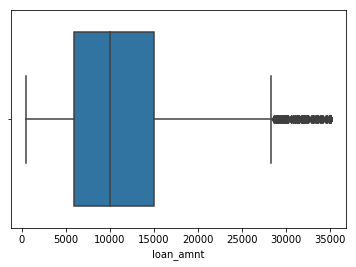

In [30]:
sns.boxplot(loan.loan_amnt)

## Derived Metrics

** We will now derive some new columns based on our business understanding that will be helpful in our analysis. **

#### 1. Loan amount to Annual Income ratio

In [41]:
loan['loan_income_ratio']= loan['loan_amnt']/loan['annual_inc']

#### 2. Extract Year from Issue date

In [42]:
loan['issue_year'] = loan['issue_d'].apply(lambda x: '20'+x[4:6])

#### 3. Extract Month from Issue date

In [43]:
loan['issue_month'] =loan['issue_d'].apply(lambda x:x[0:3])
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
loan['issue_month'] = pd.Categorical(loan['issue_month'],categories=months_order, ordered=True)

#### 4. Create Bins for range of Loan Amount

In [44]:
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=slot)

#### 5. Create Bins for range of Annual Income

In [45]:
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=slot)

#### 6. Create Bins for range of Interest rates

In [46]:
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=slot)

## VII. Exploratory Data Analysis

In [47]:
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        if width >15:
            dodge = False
            w=0.32 
        else: 
            dodge = True
            w=0.12
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,dodge=dodge) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+w, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

### Continuous Variables

#### 1. Loan Amount

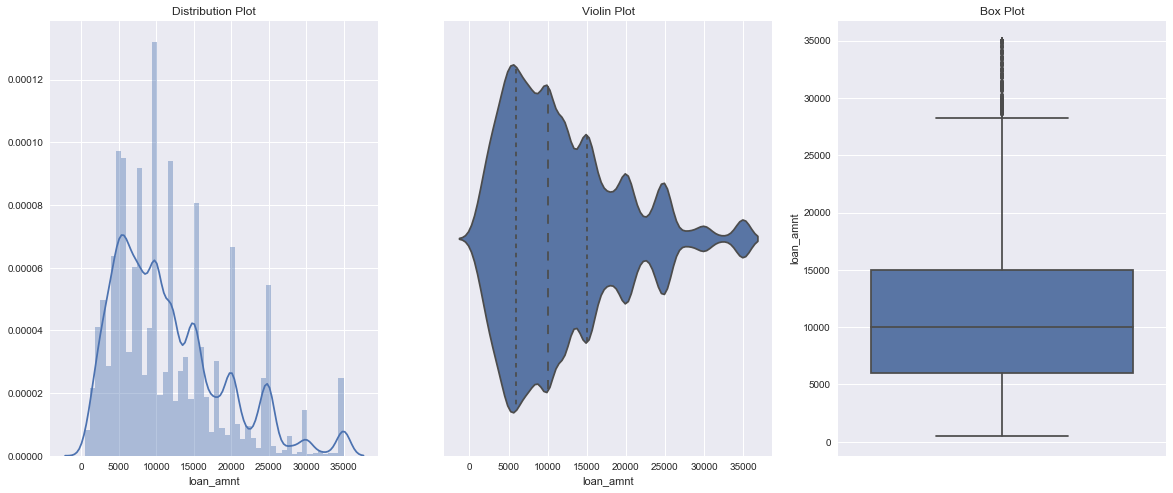

In [32]:
univariate(df=loan,col='loan_amnt',vartype=0)

<font color='blue'><b>Insights</b>: Most of the loan amounts are distributed between 5000 to 15000 USD.</font> 

#### 2. Interest Rate

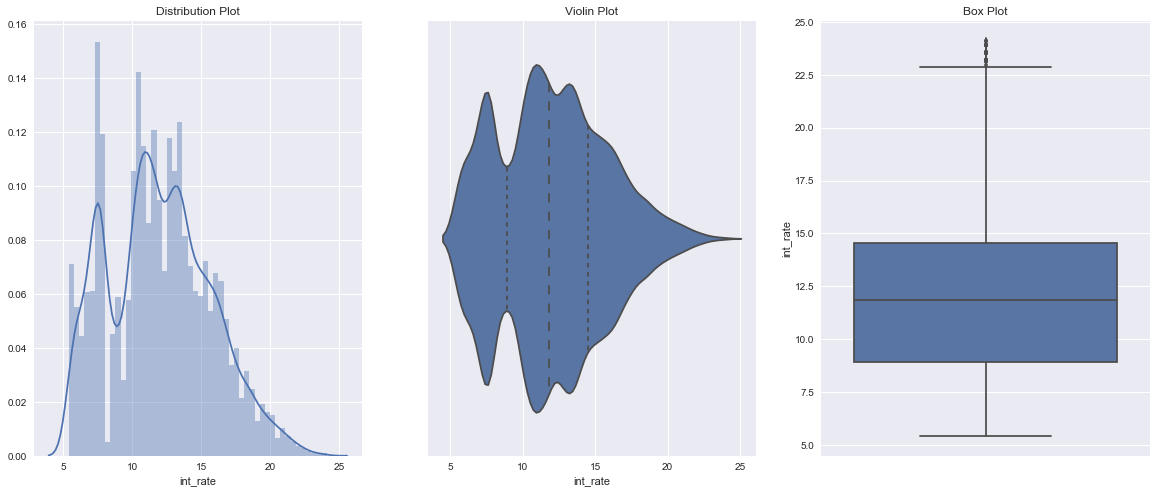

In [33]:
univariate(df=loan,col='int_rate',vartype=0)

<font color='blue'><b>Insights</b>: Most of the loans interest rates are distributed between 8% to 16%.</font> 

#### 3. Annual Income

In [34]:
loan["annual_inc"].describe()

count     32967.00
mean      69739.45
std       66058.85
min        4080.00
25%       42000.00
50%       60000.00
75%       83165.00
max     6000000.00
Name: annual_inc, dtype: float64

###### Max value is 6000000 which is 100 times more than mean value, so we will remove the outliers from Annual Income.

Remove Outliers (values from 98 to 100%)

In [35]:
q = loan["annual_inc"].quantile(0.98)
loan = loan[loan["annual_inc"] < q]

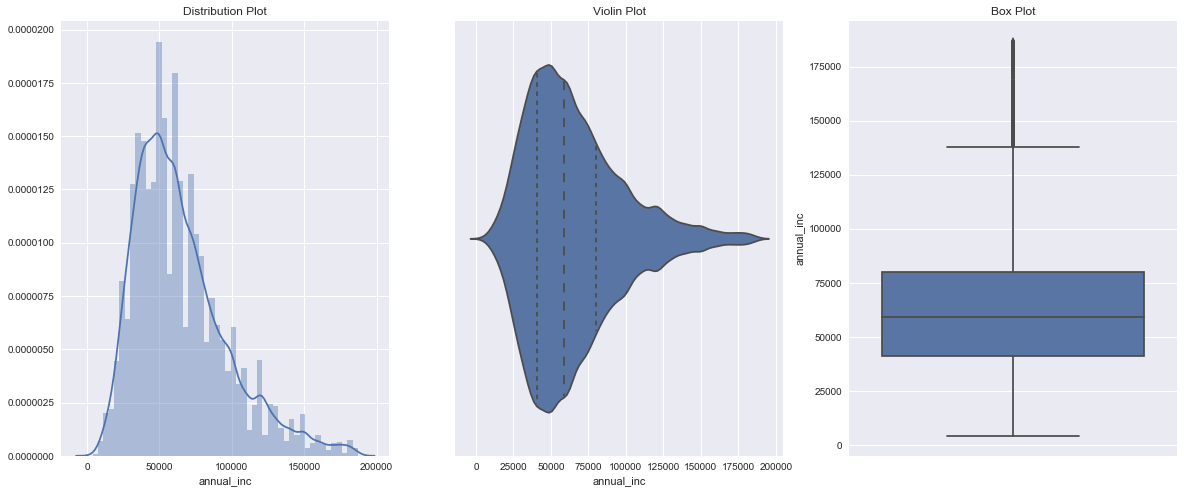

In [36]:
univariate(df=loan,col='annual_inc',vartype=0)

<font color='blue'><b>Insights</b>: Most of the applicants earns beteen 25000 to 80000 USD annually.</font> 

### Categorical Variables

#### 4. Loan Status

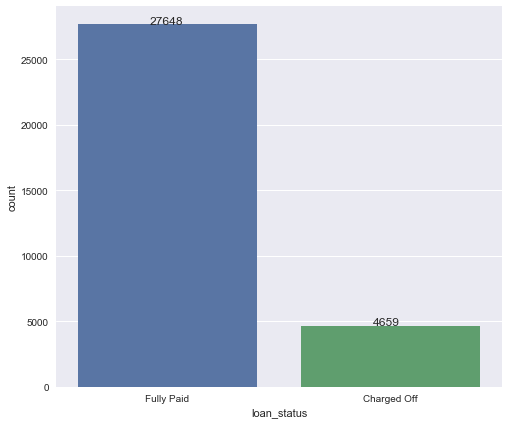

In [37]:
univariate(df=loan,col='loan_status',vartype=1)

<font color='blue'><b>Insights</b>: 17.4% of the applicants Charged off.</font> 

#### 5. Purpose of loan

In [38]:
loan.purpose.unique()

array(['credit_card', 'car', 'small_business', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical'], dtype=object)

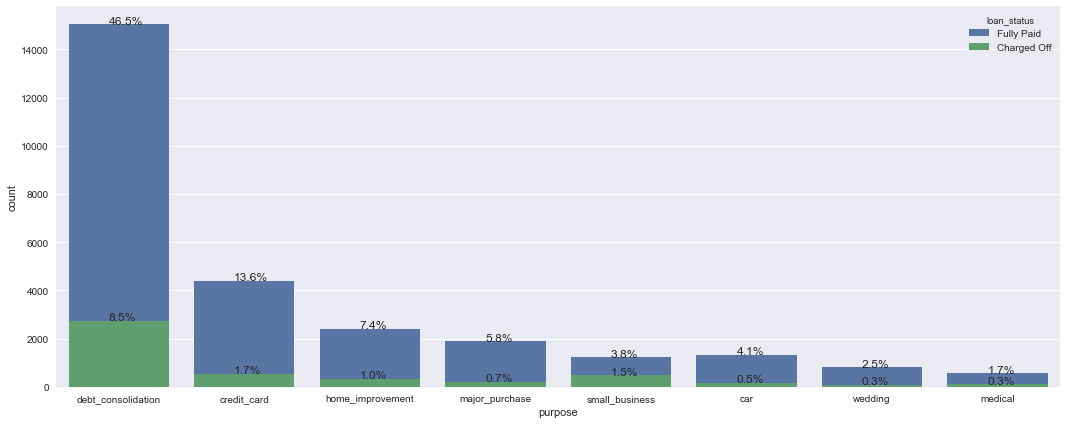

In [39]:
univariate(df=loan,col='purpose',vartype=1,hue='loan_status')

<font color='blue'><b>Insights</b>: Approx 50% of the applicants applied loan for paying their other loans(Debt Consolidation).</font> 

#### 6. Year wise Loan

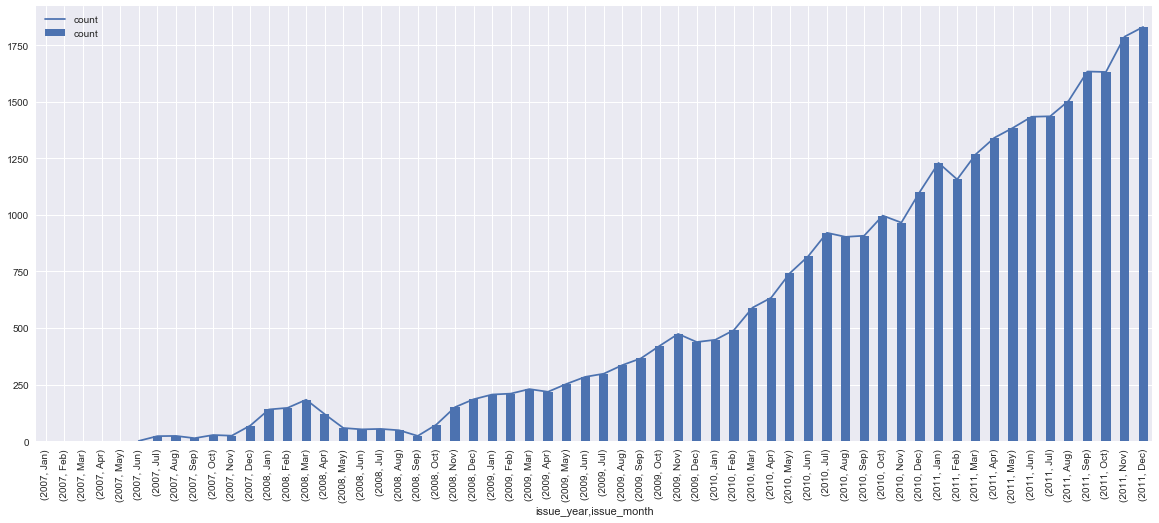

In [48]:
year_wise =loan.groupby(by= [loan.issue_year,loan.issue_month])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()


<font color='blue'><b>Insights</b>: loan applicants are increasing year on year, more than 50% of loan applicants received loans in 2011.</font> 

#### 7. Month wise Loan

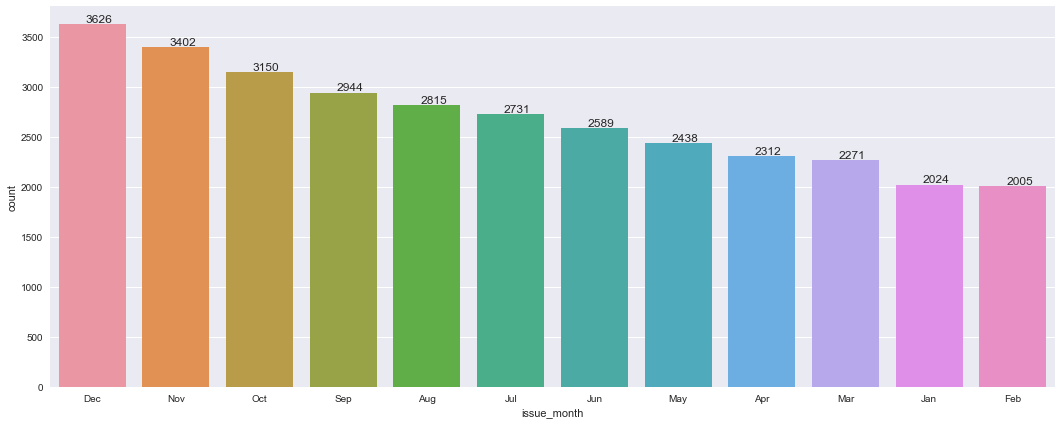

In [49]:
univariate(df=loan,col='issue_month',vartype=1)

<font color='blue'><b>Insights</b>: Loan applicants are more during end of the year.This is may be because of the year end targets</font> 

#### 8. Loan Term

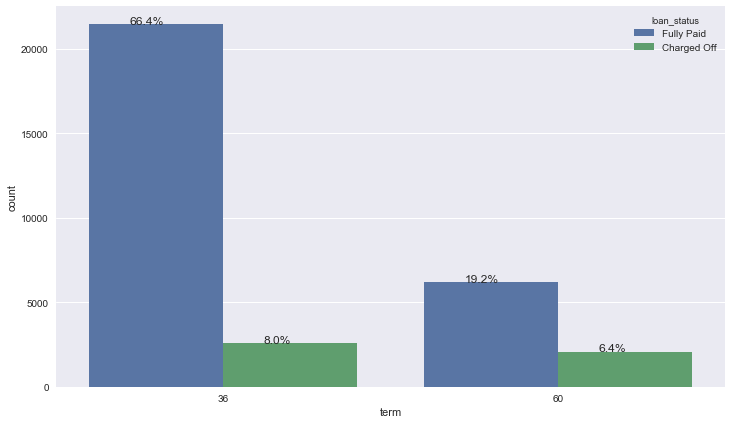

In [50]:
univariate(df=loan,col='term',vartype=1,hue='loan_status')

<font color='blue'><b>Insights</b>: 75% of applicants applied loan for 36 months term period.Applicants who are applied for 60 months term is more probable for charged off</font> 

In [51]:
loan.head(3)

emp_title emp_length home_ownership  annual_inc verification_status  \
0       NaN  10+ years           RENT    24000.00            Verified   
1     Ryder   < 1 year           RENT    30000.00     Source Verified   
2       NaN  10+ years           RENT    12252.00        Not Verified   

                  title addr_state  loan_amnt  funded_amnt  funded_amnt_inv  \
0              Computer         AZ       5000         5000          4975.00   
1                  bike         GA       2500         2500          2500.00   
2  real estate business         IL       2400         2400          2400.00   

  term  int_rate  installment grade sub_grade issue_d  loan_status   dti  \
0   36     10.65       162.87     B        B2  Dec-11   Fully Paid 27.65   
1   60     15.27        59.83     C        C4  Dec-11  Charged Off  1.00   
2   36     15.96        84.33     C        C5  Dec-11   Fully Paid  8.72   

          purpose  loan_income_ratio issue_year issue_month loan_amnt_range  \
0     credit_card               0.21       2011         Dec          0-5000   
1             car               0.08       2011         Dec          0-5000   
2  small_business               0.20       2011         Dec          0-5000   

  annual_inc_range int_rate_range  
0          0-25000        10-12.5  
1      25000-50000   15 and above  
2          0-25000   15 and above

#### 9. Correlation Matrix : All Continuos(Numeric) Variables

In [52]:
loan_correlation = loan.corr()
loan_correlation

annual_inc  loan_amnt  funded_amnt  funded_amnt_inv  \
annual_inc               1.00       0.41         0.41             0.39   
loan_amnt                0.41       1.00         0.98             0.94   
funded_amnt              0.41       0.98         1.00             0.95   
funded_amnt_inv          0.39       0.94         0.95             1.00   
int_rate                 0.07       0.31         0.32             0.31   
installment              0.41       0.93         0.95             0.90   
dti                     -0.11       0.08         0.08             0.09   
loan_income_ratio       -0.32       0.63         0.62             0.59   

                   int_rate  installment   dti  loan_income_ratio  
annual_inc             0.07         0.41 -0.11              -0.32  
loan_amnt              0.31         0.93  0.08               0.63  
funded_amnt            0.32         0.95  0.08               0.62  
funded_amnt_inv        0.31         0.90  0.09               0.59  
int_rate               1.00         0.29  0.12               0.23  
installment            0.29         1.00  0.07               0.57  
dti                    0.12         0.07  1.00               0.15  
loan_income_ratio      0.23         0.57  0.15               1.00

#### 10. HeatMap: All continuos variables

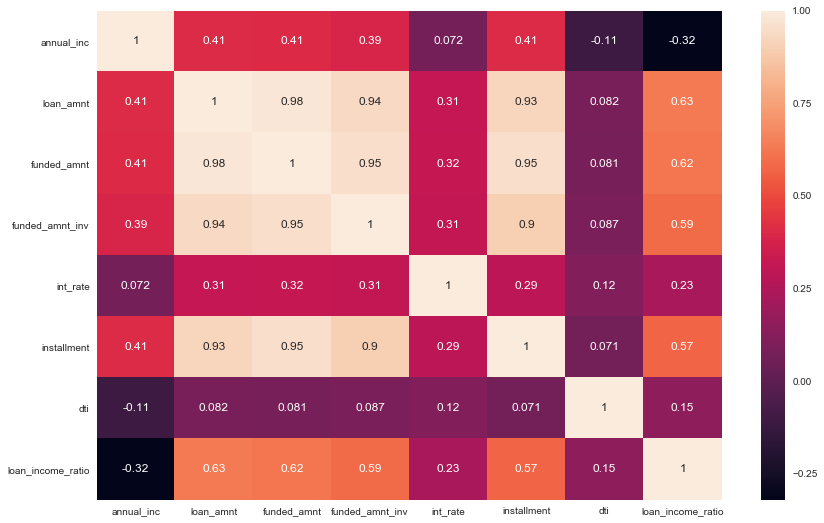

In [53]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

### Categorical Variables vs Probability of Charged Off

The main motive of this use case to find what parameters are impacting the most on Loan Status that is if a applicant will successfully complete the loan term or will charge off.

So we will be using a new term now <b>Probability of Charged Off</b> that will be equal to :

\begin{equation*}
{Probability\:of\:Charged\:Off =\:}\frac{Number\:of\:Applicants\:who\:charged\:off}{Total\:No.\:of\:Applicants}
\end{equation*}


We will calculate this probability w.r.t each column in bivariate analysis & will see how the Probability of Charged Off changes with these columns.

We will create a user defined function for this.

In [54]:
def crosstab(df,col):
    '''
    df : Dataframe
    col: Column Name
    '''
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

In [55]:
# Probability of charge off
def bivariate_prob(df,col,stacked= True):
    '''
    df      : Dataframe
    col     : Column Name
    stacked : True(default) for Stacked Bar
    '''
    # get dataframe from crosstab function
    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['Probability_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

#### 11. Location vs Probability Charge Off

In [56]:
filter_states = loan.addr_state.value_counts()
filter_states = filter_states[(filter_states < 10)]

loan_filter_states = loan.drop(labels = loan[loan.addr_state.isin(filter_states.index)].index)

loan_status  Charged Off  Fully Paid   All  Probability_Charged Off
addr_state                                                         
AK                    13          56    69                     0.19
AL                    47         334   381                     0.12
AR                    19         183   202                     0.09
AZ                   100         604   704                     0.14
CA                   929        4897  5826                     0.16

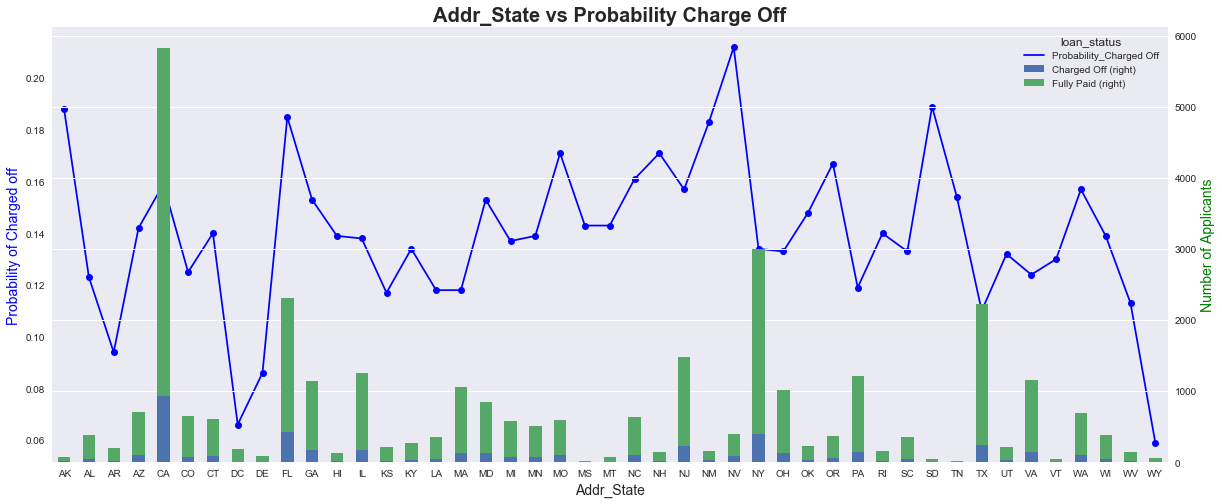

In [57]:
states = crosstab(loan_filter_states,'addr_state')
display(states.head())

bivariate_prob(df =loan_filter_states,col ='addr_state')

<font color='blue'><b>Insights</b>: There are multiple States/Provinces with high probability of charge,highest being 'NV' at 20%</font>   

#### 12. Purpose of Loan vs Probability Charge Off

In [ ]:
purpose = crosstab(loan,'purpose')
display(purpose)

bivariate_prob(df =loan,col ='purpose',stacked=False)

<font color='blue'><b>Insights</b>: Applicants who has taken the Loan for 'small business' has the highest probabilty of charge off of 28%. So bank should take extra caution like take some asset or guarentee while approving the loan for purpose of 'small business'</font>   

#### 13. Employment Length vs Probability Charge Off

In [ ]:
emp_length = crosstab(loan,'emp_length')
display(emp_length)

bivariate_prob(df =loan,col ='emp_length')

<font color='blue'><b>Insights</b>: Applicants who are self employed has more chance of charge off at 22%, Employees whose experience is between 2 to 9 years are safe bet for the bank. </font> 

#### 14. Grade/Subgrade vs Probability Charge Off

In [ ]:
grade = crosstab(loan,'grade')
display(grade)

bivariate_prob(df =loan,col ='grade',stacked=False)
bivariate_prob(df =loan,col ='sub_grade')

<font color='blue'><b>Insights</b>: As we move from Grade A to G, probability that person will charged off is increasing.</font>      

#### 15. Annual Income Range vs Probability Charge Off

In [ ]:
annual_inc_range = crosstab(loan,'annual_inc_range')
display(annual_inc_range)

bivariate_prob(df =loan,col ='annual_inc_range')

<font color='blue'><b>Insights</b>: As the annual income is decreasing the probability that person will default is increasing with highest of 18% at (0 to 25000) salary bracket.</font>      

#### 16. Loan Amount Range vs Probability Charge Off

In [ ]:
loan_amnt_range = crosstab(loan,'loan_amnt_range')
display(loan_amnt_range)

bivariate_prob(df =loan,col ='loan_amnt_range')

<font color='blue'><b>Insights</b>: As the Loan Amount is increasing the probability that person will default is increasing with highest of 24% at (25000 & above) loan bracket.</font>      

#### 17. Interest rate Range vs Probability Charge Off

In [ ]:
int_rate_range = crosstab(loan,'int_rate_range')
display(int_rate_range)

bivariate_prob(df =loan,col ='int_rate_range')

<font color='blue'><b>Insights</b>: As the interest rate is increasing the probability that person will default is increasing with highest of 25% at 15% & above bracket.</font>      

<a id='Conclusion'></a>

***
## <font color='blue'><b>X. Conclusion</b></font> 

### Target Variable
* <font color='blue'><b>Loan Status</b></font>

### Top-5 Major loan variables: 
1. <font color='blue'><b>Purpose of Loan</b></font>
2. <font color='blue'><b>Employment Length</b></font>
3. <font color='blue'><b>Grade</b></font>
4. <font color='blue'><b>Interest Rate</b></font>
5. <font color='blue'><b>Term</b></font>